<a href="https://colab.research.google.com/github/Snowdenstyll/keno/blob/main/Ontario_DailyKeno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/content/23_11_30_518434.csv")

In [3]:
df.head()

,PlayDate,AP,N01,N02,N03,N04,N05,N06,N07,N08,...,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20
0,Nov 30 2023,A,9,10,13,14,17,18,19,32,...,40,47,49,52,53,55,62,67,69,70
1,Nov 29 2023,P,1,4,6,10,12,15,17,19,...,40,44,46,47,51,54,56,57,60,68
2,Nov 29 2023,A,1,4,5,6,10,15,18,26,...,42,45,48,51,55,56,62,65,68,69
3,Nov 28 2023,P,5,6,8,9,12,15,23,25,...,42,43,47,48,49,56,57,63,65,66
4,Nov 28 2023,A,2,3,4,9,19,20,22,23,...,41,48,54,55,57,58,60,61,63,66


In [4]:
df.tail()

,PlayDate,AP,N01,N02,N03,N04,N05,N06,N07,N08,...,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20
14163,1996-05-03,P,3,8,20,26,27,32,36,38,...,45,47,50,53,54,56,59,61,67,68
14164,1996-05-02,P,4,5,7,11,13,15,19,23,...,28,35,38,40,48,50,57,58,64,66
14165,1996-05-01,P,2,3,5,7,11,14,15,20,...,46,47,48,52,56,61,62,63,66,70
14166,1996-04-30,P,6,7,10,17,23,24,27,28,...,42,43,46,48,50,55,60,61,67,70
14167,1996-04-29,P,1,2,4,6,9,13,15,16,...,34,37,41,48,50,52,53,54,57,68


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14168 entries, 0 to 14167
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   PlayDate  14168 non-null  object
 1   AP        14168 non-null  object
 2   N01       14168 non-null  int64 
 3   N02       14168 non-null  int64 
 4   N03       14168 non-null  int64 
 5   N04       14168 non-null  int64 
 6   N05       14168 non-null  int64 
 7   N06       14168 non-null  int64 
 8   N07       14168 non-null  int64 
 9   N08       14168 non-null  int64 
 10  N09       14168 non-null  int64 
 11  N10       14168 non-null  int64 
 12  N11       14168 non-null  int64 
 13  N12       14168 non-null  int64 
 14  N13       14168 non-null  int64 
 15  N14       14168 non-null  int64 
 16  N15       14168 non-null  int64 
 17  N16       14168 non-null  int64 
 18  N17       14168 non-null  int64 
 19  N18       14168 non-null  int64 
 20  N19       14168 non-null  int64 
 21  N20       14

In [6]:
df.describe()

,N01,N02,N03,N04,N05,N06,N07,N08,N09,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20
count,14168.000000,14168.000000,14168.000000,14168.000000,14168.000000,14168.000000,14168.000000,14168.000000,14168.000000,14168.000000,14168.000000,14168.000000,14168.000000,14168.000000,14168.000000,14168.000000,14168.000000,14168.000000,14168.000000,14168.000000
mean,3.345850,6.733131,10.120624,13.568041,17.007129,20.508470,23.905491,27.316629,30.679136,34.035714,37.393281,40.755717,44.108696,47.446429,50.782468,54.156479,57.520045,60.841756,64.198899,67.576158
std,2.671853,3.721341,4.456173,5.044018,5.465229,5.802598,6.015465,6.141571,6.204699,6.273152,6.256345,6.178685,6.083317,5.891776,5.664471,5.331253,4.868587,4.389673,3.716458,2.727550
min,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,9.000000,10.000000,13.000000,15.000000,18.000000,21.000000,23.000000,28.000000,32.000000,35.000000,36.000000,44.000000,48.000000
25%,1.000000,4.000000,7.000000,10.000000,13.000000,16.000000,20.000000,23.000000,26.000000,30.000000,33.000000,37.000000,40.000000,44.000000,47.000000,51.000000,54.000000,58.000000,62.000000,66.000000
50%,3.000000,6.000000,9.000000,13.000000,17.000000,20.000000,24.000000,27.000000,31.000000,34.000000,37.000000,41.000000,44.000000,48.000000,51.000000,55.000000,58.000000,61.000000,65.000000,68.000000
75%,5.000000,9.000000,13.000000,17.000000,21.000000,24.000000,28.000000,31.000000,35.000000,38.000000,42.000000,45.000000,48.000000,52.000000,55.000000,58.000000,61.000000,64.000000,67.000000,70.000000
max,21.000000,31.000000,34.000000,40.000000,42.000000,44.000000,47.000000,50.000000,53.000000,55.000000,57.000000,60.000000,62.000000,63.000000,65.000000,66.000000,67.000000,68.000000,69.000000,70.000000


In [7]:
df.drop(['PlayDate', 'AP'], axis=1, inplace=True)

In [8]:
df.head()

,N01,N02,N03,N04,N05,N06,N07,N08,N09,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20
0,9,10,13,14,17,18,19,32,34,39,40,47,49,52,53,55,62,67,69,70
1,1,4,6,10,12,15,17,19,34,37,40,44,46,47,51,54,56,57,60,68
2,1,4,5,6,10,15,18,26,31,33,42,45,48,51,55,56,62,65,68,69
3,5,6,8,9,12,15,23,25,40,41,42,43,47,48,49,56,57,63,65,66
4,2,3,4,9,19,20,22,23,36,39,41,48,54,55,57,58,60,61,63,66


In [9]:
scaler = StandardScaler().fit(df.values)
transformed_dataset = scaler.transform(df.values)
transformed_df = pd.DataFrame(data=transformed_dataset, index=df.index)

In [10]:
transformed_df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
14163,-0.129447,0.340445,2.217087,2.464781,1.828510,1.980481,2.010640,1.739579,1.341106,1.429043,1.215884,1.010652,0.968470,0.942631,0.568040,0.345807,0.303991,0.036050,0.753728,0.155399
14164,0.244839,-0.465744,-0.700317,-0.509144,-0.733230,-0.949344,-0.815509,-0.702879,-1.076502,-1.121599,-1.501454,-0.931577,-1.004207,-1.263913,-0.491231,-0.779672,-0.106820,-0.647396,-0.053520,-0.577886
14165,-0.503732,-1.003204,-1.149149,-1.302191,-1.099193,-1.121687,-1.480485,-1.191371,-0.431807,1.747873,1.375727,1.010652,0.639691,0.772896,0.921131,1.283706,0.920208,0.491681,0.484645,0.888683
14166,0.993410,0.071716,-0.027070,0.680426,1.096584,0.601740,0.514444,0.111274,0.051715,0.791382,0.736354,0.363243,0.310911,0.093960,-0.138141,0.158227,0.509397,0.036050,0.753728,0.888683
14167,-0.878017,-1.271933,-1.373564,-1.500452,-1.465156,-1.294030,-1.480485,-1.842693,-1.560024,-0.962184,-0.542393,-0.607872,-0.511038,0.093960,-0.138141,-0.404512,-0.928443,-1.558658,-1.937100,0.155399


In [11]:
# All our games
number_of_rows = df.values.shape[0]
number_of_rows

14168

In [12]:
# Amount of games we need to take into consideration for prediction
window_length = 10
window_length

10

In [13]:
# Balls counts
number_of_features = df.values.shape[1]
number_of_features

20

In [14]:
X = np.empty([ number_of_rows - window_length, window_length, number_of_features], dtype=float)
X

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [15]:
y = np.empty([ number_of_rows - window_length, number_of_features], dtype=float)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
for i in range(0, number_of_rows-window_length):
    X[i] = transformed_df.iloc[i : i+window_length, 0 : number_of_features]
    y[i] = transformed_df.iloc[i+window_length : i+window_length+1, 0 : number_of_features]

In [17]:
X.shape

(14158, 10, 20)

In [18]:
y.shape

(14158, 20)

In [19]:
X[0]

array([[ 2.11626551e+00,  8.77905147e-01,  6.46177304e-01,
         8.56409776e-02, -1.30442701e-03, -4.32316380e-01,
        -8.15508793e-01,  7.62595784e-01,  5.35236418e-01,
         7.91382237e-01,  4.16666814e-01,  1.01065243e+00,
         8.04080534e-01,  7.72896406e-01,  3.91494797e-01,
         1.58227425e-01,  9.20208141e-01,  1.40294293e+00,
         1.29189404e+00,  8.88683174e-01],
       [-8.78017183e-01, -7.34473826e-01, -9.24732864e-01,
        -7.07405670e-01, -9.16211452e-01, -9.49344389e-01,
        -1.14799692e+00, -1.35420112e+00,  5.35236418e-01,
         4.72551983e-01,  4.16666814e-01,  5.25095107e-01,
         3.10911140e-01, -7.57741575e-02,  3.84043212e-02,
        -2.93523723e-02, -3.12225903e-01, -8.75211276e-01,
        -1.12985176e+00,  1.55398575e-01],
       [-8.78017183e-01, -7.34473826e-01, -1.14914860e+00,
        -1.50045232e+00, -1.28217426e+00, -9.49344389e-01,
        -9.81752856e-01, -2.14387403e-01,  5.17148726e-02,
        -1.65108524e-01,  7.3

In [20]:
X[1]

array([[-8.78017183e-01, -7.34473826e-01, -9.24732864e-01,
        -7.07405670e-01, -9.16211452e-01, -9.49344389e-01,
        -1.14799692e+00, -1.35420112e+00,  5.35236418e-01,
         4.72551983e-01,  4.16666814e-01,  5.25095107e-01,
         3.10911140e-01, -7.57741575e-02,  3.84043212e-02,
        -2.93523723e-02, -3.12225903e-01, -8.75211276e-01,
        -1.12985176e+00,  1.55398575e-01],
       [-8.78017183e-01, -7.34473826e-01, -1.14914860e+00,
        -1.50045232e+00, -1.28217426e+00, -9.49344389e-01,
        -9.81752856e-01, -2.14387403e-01,  5.17148726e-02,
        -1.65108524e-01,  7.36353558e-01,  6.86947548e-01,
         6.39690736e-01,  6.03162293e-01,  7.44585273e-01,
         3.45807222e-01,  9.20208141e-01,  9.47312092e-01,
         1.02281117e+00,  5.22040874e-01],
       [ 6.19124164e-01, -1.97014168e-01, -4.75901387e-01,
        -9.05667332e-01, -9.16211452e-01, -9.49344389e-01,
        -1.50532544e-01, -3.77217934e-01,  1.50227951e+00,
         1.11021249e+00,  7.3

In [21]:
y[0]

array([-0.12944651,  0.07171566, -0.25148565, -0.70740567,  1.27956541,
        0.94642498,  1.34566402,  1.08825685,  1.17993181,  1.26962762,
        0.89619693,  0.68694755,  0.47530094,  0.77289641,  0.56804003,
        0.34580722,  1.33101949,  1.17512751,  0.7537283 ,  0.15539857])

In [22]:
y[1]

array([ 1.74198017e+00,  8.77905147e-01,  6.46177304e-01,  4.82164301e-01,
       -1.30442701e-03, -4.32316380e-01, -3.16776606e-01, -7.02878997e-01,
       -1.07650207e+00, -9.62184158e-01, -8.62080163e-01, -9.31576867e-01,
       -1.16859704e+00, -1.43364706e+00, -1.90359330e+00, -1.90515034e+00,
       -1.75006562e+00, -1.78647296e+00, -2.47526609e+00, -3.14438212e+00])

In [23]:
# Recurrent Neural Netowrk (RNN) with Long Short Term Memory (LSTM)
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Dropout
batch_size = 100

In [24]:
# Initialising the RNN
model = Sequential()
# Adding the input layer and the LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a first Dropout layer
model.add(Dropout(0.2))
# Adding a second LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a second Dropout layer
model.add(Dropout(0.2))
# Adding a third LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a fourth LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = False)))
# Adding a fourth Dropout layer
model.add(Dropout(0.2))
# Adding the first output layer
model.add(Dense(70, activation='softmax'))
# Adding the last output layer
model.add(Dense(number_of_features))

In [25]:
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss ='mse', metrics=['accuracy'])

In [26]:
history = model.fit(x=X, y=y, batch_size=100, epochs=400, verbose=2)

Epoch 1/400
142/142 - 22s - loss: 1.0004 - accuracy: 0.0506 - 22s/epoch - 156ms/step
Epoch 2/400
142/142 - 3s - loss: 1.0002 - accuracy: 0.0504 - 3s/epoch - 20ms/step
Epoch 3/400
142/142 - 2s - loss: 1.0000 - accuracy: 0.0503 - 2s/epoch - 17ms/step
Epoch 4/400
142/142 - 2s - loss: 0.9997 - accuracy: 0.0553 - 2s/epoch - 16ms/step
Epoch 5/400
142/142 - 2s - loss: 0.9994 - accuracy: 0.0588 - 2s/epoch - 16ms/step
Epoch 6/400
142/142 - 2s - loss: 0.9992 - accuracy: 0.0542 - 2s/epoch - 17ms/step
Epoch 7/400
142/142 - 3s - loss: 0.9989 - accuracy: 0.0586 - 3s/epoch - 19ms/step
Epoch 8/400
142/142 - 3s - loss: 0.9988 - accuracy: 0.0589 - 3s/epoch - 18ms/step
Epoch 9/400
142/142 - 2s - loss: 0.9984 - accuracy: 0.0623 - 2s/epoch - 17ms/step
Epoch 10/400
142/142 - 2s - loss: 0.9983 - accuracy: 0.0660 - 2s/epoch - 17ms/step
Epoch 11/400
142/142 - 2s - loss: 0.9979 - accuracy: 0.0639 - 2s/epoch - 17ms/step
Epoch 12/400
142/142 - 2s - loss: 0.9975 - accuracy: 0.0600 - 2s/epoch - 17ms/step
Epoch 13/4

In [27]:
#Save The Model
import datetime

date = datetime.datetime.now()
version = (date.strftime("%y_%m_%d_%f")) + "\n"
prefix_model_version = 'on_keno_model_'
model_version = prefix_model_version + version

''' f = open("/logs/modelversions.txt", "a")
f.write(model_version + str(history.history) + "\n\n")
f.close() '''

model.save(model_version + ".keras");

dict_keys(['loss', 'accuracy'])


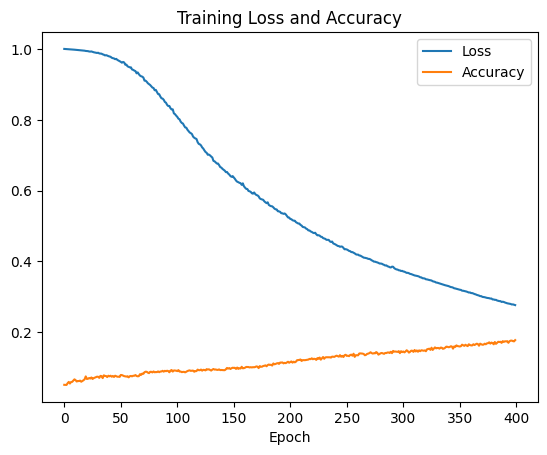

In [28]:
print(history.history.keys())

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'])
plt.show()

In [29]:
to_predict = df.head(7)
to_predict.drop([to_predict.index[0]],axis=0, inplace=True)
to_predict

<ipython-input-29-3b01e1b350c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict.drop([to_predict.index[-1]],axis=0, inplace=True)


,N01,N02,N03,N04,N05,N06,N07,N08,N09,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20
0,9,10,13,14,17,18,19,32,34,39,40,47,49,52,53,55,62,67,69,70
1,1,4,6,10,12,15,17,19,34,37,40,44,46,47,51,54,56,57,60,68
2,1,4,5,6,10,15,18,26,31,33,42,45,48,51,55,56,62,65,68,69
3,5,6,8,9,12,15,23,25,40,41,42,43,47,48,49,56,57,63,65,66
4,2,3,4,9,19,20,22,23,36,39,41,48,54,55,57,58,60,61,63,66
5,7,8,10,17,18,22,25,27,29,34,42,45,46,51,55,56,59,62,64,67
6,1,10,12,19,21,22,27,35,37,38,39,43,45,46,52,54,55,62,63,70
7,5,6,7,12,14,16,18,21,22,31,49,54,56,58,59,61,63,64,66,68
8,1,11,14,16,17,20,22,27,29,30,45,47,51,52,55,57,61,62,65,70
9,5,6,13,18,31,34,36,39,40,41,43,44,48,51,57,60,62,64,66,69


In [30]:
to_predict = np.array(to_predict)
to_predict

array([[ 9, 10, 13, 14, 17, 18, 19, 32, 34, 39, 40, 47, 49, 52, 53, 55,
        62, 67, 69, 70],
       [ 1,  4,  6, 10, 12, 15, 17, 19, 34, 37, 40, 44, 46, 47, 51, 54,
        56, 57, 60, 68],
       [ 1,  4,  5,  6, 10, 15, 18, 26, 31, 33, 42, 45, 48, 51, 55, 56,
        62, 65, 68, 69],
       [ 5,  6,  8,  9, 12, 15, 23, 25, 40, 41, 42, 43, 47, 48, 49, 56,
        57, 63, 65, 66],
       [ 2,  3,  4,  9, 19, 20, 22, 23, 36, 39, 41, 48, 54, 55, 57, 58,
        60, 61, 63, 66],
       [ 7,  8, 10, 17, 18, 22, 25, 27, 29, 34, 42, 45, 46, 51, 55, 56,
        59, 62, 64, 67],
       [ 1, 10, 12, 19, 21, 22, 27, 35, 37, 38, 39, 43, 45, 46, 52, 54,
        55, 62, 63, 70],
       [ 5,  6,  7, 12, 14, 16, 18, 21, 22, 31, 49, 54, 56, 58, 59, 61,
        63, 64, 66, 68],
       [ 1, 11, 14, 16, 17, 20, 22, 27, 29, 30, 45, 47, 51, 52, 55, 57,
        61, 62, 65, 70],
       [ 5,  6, 13, 18, 31, 34, 36, 39, 40, 41, 43, 44, 48, 51, 57, 60,
        62, 64, 66, 69],
       [ 3,  7,  9, 10, 24, 26

In [31]:
scaled_to_predict = scaler.transform(to_predict)

In [32]:
y_pred = model.predict(np.array([scaled_to_predict]))
print("The predicted numbers in the last lottery game are:", scaler.inverse_transform(y_pred).astype(int)[0])

1/1 [==============================] - 4s 4s/step
The predicted numbers in the last lottery game are: [ 2  5  7 10 13 15 18 21 23 26 29 32 35 37 41 44 48 53 58 64]


In [33]:
prediction = df.head(1)
prediction = np.array(prediction)
print("The actual numbers in the last lottery game were:", prediction[0])

The actual numbers in the last lottery game were: [ 9 10 13 14 17 18 19 32 34 39 40 47 49 52 53 55 62 67 69 70]


In [34]:
temp = np.array(scaler.inverse_transform(y_pred).astype(int)[0])
combined_array = np.concatenate((temp, np.array(prediction[0])))
winning_numbers = np.bincount(combined_array)
winners = np.unique(combined_array)

uniques, uniq_idx, counts = np.unique(combined_array,return_index=True,return_counts=True)
duplicates = combined_array[ uniq_idx[counts>=2] ]  # <--- Get duplicates

print("winners:", duplicates)
print(len(duplicates)/20)

winners: [10 13 18 32 53]
0.25


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, batch_size=50, epochs=300, verbose=2)

# Evaluate on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Make predictions on the test set
predictions = model.predict(X_test)


Epoch 1/300
227/227 - 4s - loss: 0.2938 - accuracy: 0.1741 - 4s/epoch - 17ms/step
Epoch 2/300
227/227 - 4s - loss: 0.2934 - accuracy: 0.1699 - 4s/epoch - 16ms/step
Epoch 3/300
227/227 - 3s - loss: 0.2905 - accuracy: 0.1722 - 3s/epoch - 13ms/step
Epoch 4/300
227/227 - 3s - loss: 0.2808 - accuracy: 0.1738 - 3s/epoch - 13ms/step
Epoch 5/300
227/227 - 4s - loss: 0.2777 - accuracy: 0.1761 - 4s/epoch - 16ms/step
Epoch 6/300
227/227 - 4s - loss: 0.2761 - accuracy: 0.1790 - 4s/epoch - 16ms/step
Epoch 7/300
227/227 - 3s - loss: 0.2744 - accuracy: 0.1783 - 3s/epoch - 13ms/step
Epoch 8/300
227/227 - 3s - loss: 0.2735 - accuracy: 0.1796 - 3s/epoch - 13ms/step
Epoch 9/300
227/227 - 4s - loss: 0.2716 - accuracy: 0.1843 - 4s/epoch - 16ms/step
Epoch 10/300
227/227 - 4s - loss: 0.2712 - accuracy: 0.1814 - 4s/epoch - 16ms/step
Epoch 11/300
227/227 - 3s - loss: 0.2694 - accuracy: 0.1788 - 3s/epoch - 13ms/step
Epoch 12/300
227/227 - 3s - loss: 0.2689 - accuracy: 0.1776 - 3s/epoch - 13ms/step
Epoch 13/300
